# BELLABEAT 

<i>How can a wellness technology company play it smart?</i>

In [2]:
from IPython.display import Image
from IPython.core.display import HTML 

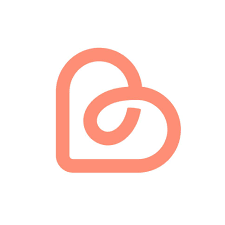

In [3]:
Image("Images/BellaBeat_Logo.png")

### ABOUT THE COMPANY
<p>Bellabeat is a high-tech company that manufactures health-focused smart products. Founded in 2013 by artist Urška Sršen and mathematician Sando Mur, the company has many products carefully designed to monitor activity, stress, sleep, and reproductive data to help women better understand how their bodies work and make healthier choices. While small in size, Bellabeat has quickly positioned itself as a tech-driven wellness company for women. Chief Creative Officer, Urška Sršen, believes that analyzing smart device fitness data could help unlock new growth opportunities for the company.</p>

### BUSINESS TASK
<p>Focus on one of Bellabeat’s products and analyze smart device data to gain insight into how consumers use non-Bellabeat smart devices.</p>

### PRODUCT
<p><li><b>BellaBeat App : </b>The Bellabeat app provides users with health data related to their activity, sleep, stress, menstrual cycle, and mindfulness habits. This data can help users better understand their current habits and make healthy decisions. The Bellabeat app connects to their line of smart wellness products.</li></p>

### STAKEHOLDERS
<p><li><b>Urška Sršen</b> – Bellabeat’s cofounder and Chief Creative Officer.</li></p>
<p><li><b>Sando Mur</b> – Mathematician and Bellabeat’s cofounder; key member of the Bellabeat executive team.</li></p>
<p><li><b>Bellabeat Marketing Analytics Team</b> – A team of data analysts responsible for collecting, analyzing, and reporting data that helps guide Bellabeat’s marketing strategy.</li></p>

## 1. ASK
<p><li>What are some trends in smart device usage?</li></p>
<p><li>How could these trends apply to Bellabeat customers?</li></p>
<p><li>How could these trends help influence Bellabeat marketing strategy?</li></p>

## 2. PREPARE
<b>Urška Sršen</b> encourages the use of public data that explores smart device users’ daily habits. Therefore, the dataset used in this project will be the FitBit Fitness Tracker Data (CC0: Public Domain, dataset made available through [Möbius](https://www.kaggle.com/arashnic)).

### About the data
According to its source, the dataset was generated by respondents to a distributed survey via Amazon Mechanical Turk and comprehends dates between 03-12-2016 and 05-12-2016. Thirty FitBit users consented to the submission of their personal tracker data – which includes a minute-level output for physical activity, heart rate, and sleep monitoring. Variation between output represents the use of different types of Fitbit trackers and individual tracking behaviors/preferences.

This public dataset is comprised of 18 CSV files – each containing specific tracking information, such as daily calories, daily steps, etc. The data is organized in the long format, where an Id column identifies each user, and the remaining columns contain different attributes about the said user.

In regard to data bias, considering that the dataset only gathers information of 33 FitBit users over the span of two months, it is important to keep in mind that there is a real possibility that the data isn’t a perfect representation of all FitBit users. However, we can still analyze the dataset and learn interesting information about the surveyed users and how they used their smart tracking devices over that time period.

## 3. PROCESS
<p>Load the libraries and datasets that are going to be used. Then, start with data exploration by getting an overview of the datasets, checking the data types, gathering a statistics summary, as well as cleaning the data.</p>

### Loading Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype

### Loading Datasets & Getting an overview of the data 

In [5]:
daily_activity = pd.read_csv(r'/Users/jessica/Desktop/BellaBeat/Data/daily_activity_merged.csv')

In [6]:
daily_activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [7]:
weight = pd.read_csv(r'/Users/jessica/Desktop/BellaBeat/Data/weightLogInfo_merged.csv')

In [8]:
weight.head()

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000


In [9]:
sleep_day = pd.read_csv(r'/Users/jessica/Desktop/BellaBeat/Data/sleep_day_merged.csv')

In [10]:
sleep_day.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [11]:
hourly_steps = pd.read_csv(r'/Users/jessica/Desktop/BellaBeat/Data/hourly_steps_merged.csv')

In [12]:
hourly_steps.head()

,Id,ActivityHour,StepTotal
0,1503960366,4/12/2016 12:00:00 AM,373
1,1503960366,4/12/2016 1:00:00 AM,160
2,1503960366,4/12/2016 2:00:00 AM,151
3,1503960366,4/12/2016 3:00:00 AM,0
4,1503960366,4/12/2016 4:00:00 AM,0


In [13]:
hourly_calories = pd.read_csv(r'/Users/jessica/Desktop/BellaBeat/Data/hourly_calories_merged.csv')

In [14]:
hourly_calories.head()

,Id,ActivityHour,Calories
0,1503960366,4/12/2016 12:00:00 AM,81
1,1503960366,4/12/2016 1:00:00 AM,61
2,1503960366,4/12/2016 2:00:00 AM,59
3,1503960366,4/12/2016 3:00:00 AM,47
4,1503960366,4/12/2016 4:00:00 AM,48


## Data Exploration

### Checking the data types in each dataset

In [15]:
daily_activity.dtypes

Id                            int64
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
dtype: object

In [16]:
weight.dtypes

Id                  int64
Date               object
WeightKg          float64
WeightPounds      float64
Fat               float64
BMI               float64
IsManualReport       bool
LogId               int64
dtype: object

In [17]:
sleep_day.dtypes

Id                     int64
SleepDay              object
TotalSleepRecords      int64
TotalMinutesAsleep     int64
TotalTimeInBed         int64
dtype: object

In [18]:
hourly_steps.dtypes

Id               int64
ActivityHour    object
StepTotal        int64
dtype: object

In [19]:
hourly_calories.dtypes

Id               int64
ActivityHour    object
Calories         int64
dtype: object

### Summary Statistics

#### How many unique participants are there in each dataframe

In [20]:

daily_activity.Id.nunique()

33

In [21]:
weight.Id.nunique()

8

In [22]:
sleep_day.Id.nunique()

24

In [23]:
hourly_steps.Id.nunique()

33

In [24]:
hourly_calories.Id.nunique()

33

>**Note:** By looking at the above results, it seems like <b>not all 33 participants have logged their weight or sleep information on the app.</b>
><p>The fact that <b>weight</b> dataset only contains information from eight users could be a red flag when it comes to making recommendations for the general public. Those users may not adequately represent the population, which could lead to bias results. Hence, I will not include this dataset in the analysis.</p>

#### How many rows are in each column?

In [25]:
daily_activity.shape

(940, 15)

In [26]:
sleep_day.shape

(413, 5)

In [27]:
hourly_steps.shape

(22099, 3)

In [28]:
hourly_calories.shape

(22099, 3)

#### Daily Activity

In [29]:
daily_activity.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000


In [30]:
sleep_day.describe()

,Id,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
count,4.130000e+02,413.000000,413.000000,413.000000
mean,5.000979e+09,1.118644,419.467312,458.639225
std,2.060360e+09,0.345521,118.344679,127.101607
min,1.503960e+09,1.000000,58.000000,61.000000
25%,3.977334e+09,1.000000,361.000000,403.000000
50%,4.702922e+09,1.000000,433.000000,463.000000
75%,6.962181e+09,1.000000,490.000000,526.000000
max,8.792010e+09,3.000000,796.000000,961.000000


In [31]:
hourly_steps.describe()

,Id,StepTotal
count,2.209900e+04,22099.000000
mean,4.848235e+09,320.166342
std,2.422500e+09,690.384228
min,1.503960e+09,0.000000
25%,2.320127e+09,0.000000
50%,4.445115e+09,40.000000
75%,6.962181e+09,357.000000
max,8.877689e+09,10554.000000


In [32]:
hourly_calories.describe()

,Id,Calories
count,2.209900e+04,22099.000000
mean,4.848235e+09,97.386760
std,2.422500e+09,60.702622
min,1.503960e+09,42.000000
25%,2.320127e+09,63.000000
50%,4.445115e+09,83.000000
75%,6.962181e+09,108.000000
max,8.877689e+09,948.000000


### Cleaning Data

#### Checking for empty cells

In [33]:
daily_activity.isnull().any()

Id                          False
ActivityDate                False
TotalSteps                  False
TotalDistance               False
TrackerDistance             False
LoggedActivitiesDistance    False
VeryActiveDistance          False
ModeratelyActiveDistance    False
LightActiveDistance         False
SedentaryActiveDistance     False
VeryActiveMinutes           False
FairlyActiveMinutes         False
LightlyActiveMinutes        False
SedentaryMinutes            False
Calories                    False
dtype: bool

In [34]:
sleep_day.isnull().any()

Id                    False
SleepDay              False
TotalSleepRecords     False
TotalMinutesAsleep    False
TotalTimeInBed        False
dtype: bool

In [35]:
hourly_steps.isnull().any()

Id              False
ActivityHour    False
StepTotal       False
dtype: bool

In [36]:
hourly_calories.isnull().any()

Id              False
ActivityHour    False
Calories        False
dtype: bool

>No observations found missing values(NaN)

#### Looking for duplicate values

In [37]:
daily_activity.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
935    False
936    False
937    False
938    False
939    False
Length: 940, dtype: bool

In [38]:
sleep_day.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
408    False
409    False
410    False
411    False
412    False
Length: 413, dtype: bool

In [39]:
hourly_steps.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
22094    False
22095    False
22096    False
22097    False
22098    False
Length: 22099, dtype: bool

In [40]:
hourly_calories.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
22094    False
22095    False
22096    False
22097    False
22098    False
Length: 22099, dtype: bool

><p>No duplicate rows found.</p>

# 4. ANALYZE

<p>Now we will perform data transformation, change data formatting if necessary and merge datasets in order to perform analysis. We will also aggregate and group data to perform calculations and answer questions like the average of total steps by day of the week, the average number of daily steps taken by the user, and the most active time of day.</p>

### Data Transformations
<p>On this next step, I will transform certain aspects of the data in order to analyze them.</p>

#### Renaming the date column
<p>The date column is named differently across the dataset, so let's rename to make it easier for when we merge the datasets later.</p>

In [41]:
daily_activity = daily_activity.rename(columns={'ActivityDate' : 'Date'})

In [42]:
sleep_day = sleep_day.rename(columns={'SleepDay' : 'Date'})

In [43]:
hourly_steps = hourly_steps.rename(columns={'ActivityHour' : 'Time'})

In [44]:
hourly_calories = hourly_calories.rename(columns={'ActivityHour' : 'Time'})

#### Changing data formatting
<p>Looking at the results above, we can see the date column in all dataframes are of type object. We need to change the data type to datetime to perform calculations.</p>

In [45]:
daily_activity['Date'] = pd.to_datetime(daily_activity['Date'])

In [46]:
sleep_day['Date'] = pd.to_datetime(sleep_day['Date'])

In [47]:
hourly_steps['Time'] = pd.to_datetime(hourly_steps['Time'])

In [48]:
hourly_calories['Time'] = pd.to_datetime(hourly_calories['Time'])

#### Create a day of the week column
<p>Creating day of the week deriving from the date column so we can better analyze our data</p>

In [49]:
daily_activity['DayofWeek'] = daily_activity['Date'].dt.day_name()

In [50]:
hourly_steps['DayofWeek'] = hourly_steps['Time'].dt.day_name()

#### Merging the datasets
<p>Combining some of our datasets can make the analysis process easier and help find trends in our data.</p>

In [51]:
# Merging daily_activity and sleep_day datasets
daily_activity_sleep_day_merged = pd.merge(daily_activity, sleep_day, on='Date')

In [52]:
daily_activity_sleep_day_merged.isnull().any()

Id_x                        False
Date                        False
TotalSteps                  False
TotalDistance               False
TrackerDistance             False
LoggedActivitiesDistance    False
VeryActiveDistance          False
ModeratelyActiveDistance    False
LightActiveDistance         False
SedentaryActiveDistance     False
VeryActiveMinutes           False
FairlyActiveMinutes         False
LightlyActiveMinutes        False
SedentaryMinutes            False
Calories                    False
DayofWeek                   False
Id_y                        False
TotalSleepRecords           False
TotalMinutesAsleep          False
TotalTimeInBed              False
dtype: bool

In [53]:
# Renaming certain columns for readability
daily_activity_sleep_day_merged = daily_activity_sleep_day_merged.rename(columns={'Id_x' : 'Id_Activity'})
daily_activity_sleep_day_merged = daily_activity_sleep_day_merged.rename(columns={'Id_y' : 'Id_Sleep'})
daily_activity_sleep_day_merged.head()

,Id_Activity,Date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,DayofWeek,Id_Sleep,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday,1503960366,1,327,346
1,1503960366,2016-04-12,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday,1927972279,3,750,775
2,1503960366,2016-04-12,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday,2026352035,1,503,546
3,1503960366,2016-04-12,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday,3977333714,1,274,469
4,1503960366,2016-04-12,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday,4020332650,1,501,541


In [54]:
# Merging hourly_steps and hourly_calories
hourly_merged = pd.merge(hourly_steps, hourly_calories, on=['Time', 'Id'])
hourly_merged.head()

,Id,Time,StepTotal,DayofWeek,Calories
0,1503960366,2016-04-12 00:00:00,373,Tuesday,81
1,1503960366,2016-04-12 01:00:00,160,Tuesday,61
2,1503960366,2016-04-12 02:00:00,151,Tuesday,59
3,1503960366,2016-04-12 03:00:00,0,Tuesday,47
4,1503960366,2016-04-12 04:00:00,0,Tuesday,48


<p>Lets us find out how many days were recoreded on this dataframe?</p>

In [55]:
hourly_merged['Time'].max() - hourly_merged['Time'].min()

Timedelta('30 days 15:00:00')

> **Note :** Looks like we've 30 days worth of total num of steps and burned calories.

### Activity Data
<p>Let us take a closer look on more specific information surrounding our users activity.</p>

#### Analyze the average of total steps and calories
<p>How many steps do our users take daily? How many calories do our users burn on average?</p>

In [56]:
daily_activity.agg(
                   {'TotalSteps' : ['mean', 'min', 'max'],
                    'Calories' : ['mean', 'min', 'max'],
                   })

,TotalSteps,Calories
mean,7637.910638,2303.609574
min,0.000000,0.000000
max,36019.000000,4900.000000


> **Note :** The average total daily steps taken by the users is <b>7,638</b> steps. According to [BioMed Central](https://ijbnpa.biomedcentral.com/articles/10.1186/1479-5868-8-79), taking 10K steps a day is a reasonable target for healthy adults, helping reduce certain health conditions, such as high blood pressure and heart disease. <p>In order to compare daily steps to an activity level, the following categories can be considered:<li><b>Inactive :</b> Less than 5K steps/day</li><li><b>Average :</b> Between 7,500 and 9,999 steps/day</li><li><b>Very Active :</b> More than 12,500 steps/day</li></p><p>Given the information above, I conclude that users in our data fall into the <b>Average</b> category. With this in mind, it becomes much clear that the users should improve their amount of daily steps for optimal health and well-being.</p>

#### Analyzing the average of total steps by the day of the week
<p>Are the users consistent with the number of total steps taken throughout the week? Or are there significant changes as the days go by?</p>

In [57]:
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cat_type = CategoricalDtype(categories=cats, ordered=True)
daily_activity_sleep_day_merged['DayofWeek'] = daily_activity_sleep_day_merged['DayofWeek'].astype(cat_type)
df_day_of_week = daily_activity_sleep_day_merged.copy().groupby(daily_activity_sleep_day_merged['DayofWeek']).mean().reindex(cats)
df_day_of_week.filter(['TotalSteps'])

,TotalSteps
DayofWeek,
Monday,7755.040426
Tuesday,8115.021662
Wednesday,7593.504995
Thursday,7651.824517
Friday,7449.285319
Saturday,8159.764314
Sunday,6943.197226


#### Analyzing the most active time of the day
<p>What are the most active hours of hte users day on average? Are they during day OR night?</p>

In [58]:
hourly_merged.groupby(hourly_merged['Time'].dt.hour)['StepTotal'].mean()

Time
0      42.188437
1      23.102894
2      17.110397
3       6.426581
4      12.699571
5      43.869099
6     178.508056
7     306.049409
8     427.544576
9     433.301826
10    481.665231
11    456.886731
12    548.642082
13    537.698154
14    540.513572
15    406.319126
16    496.845645
17    550.232892
18    599.169978
19    583.390728
20    353.905077
21    308.138122
22    237.987832
23    122.132890
Name: StepTotal, dtype: float64

#### Analyzing the time of the day users burn the most calories
<p>When are the users burning the most calories? In the morning, afternoon OR the evening(night)?</p>

In [59]:
hourly_merged.groupby(hourly_merged['Time'].dt.hour)['Calories'].mean()

Time
0      71.805139
1      70.165059
2      69.186495
3      67.538049
4      68.261803
5      81.708155
6      86.996778
7      94.477981
8     103.337272
9     106.142857
10    110.460710
11    109.806904
12    117.197397
13    115.309446
14    115.732899
15    106.637158
16    113.327453
17    122.752759
18    123.492274
19    121.484547
20    102.357616
21     96.056354
22     88.265487
23     77.593577
Name: Calories, dtype: float64

#### Analyzing different categories of activity
<p>How active are the users throughout the day? Do they spend a significant amount of their day being very active, OR perhaps, not active enough?</p>

In [60]:
daily_activity.agg(
    {
        'VeryActiveMinutes' : ['mean', 'min', 'max'],
        'FairlyActiveMinutes' : ['mean', 'min', 'max'],
        'LightlyActiveMinutes' : ['mean', 'min', 'max'],
        'SedentaryMinutes' : ['mean', 'min', 'max']
    })

,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes
mean,21.164894,13.564894,192.812766,991.210638
min,0.000000,0.000000,0.000000,0.000000
max,210.000000,143.000000,518.000000,1440.000000


> **Note :** If we take a close look into the average amount of time spent on the different categories of active minutes, we can see that the amount of <b>time the users spend being sedentary is quite significant</b>. If we do the mental math, we learn that <b>the users are Sedentary for on average of 16.5 hours of their day, they spend about 3.2 hours of their day on being lightly ative and 23 minutes being fairly active, and 35 minutes being ver active.</b>

#### Analyzing average amount of time spend in each activity category
<p>Let us take a close look at how our users are spending their day on average.</p>

In [61]:
minutes_categories = daily_activity_sleep_day_merged[['VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes']].mean()
minutes_categories

VeryActiveMinutes        21.265822
FairlyActiveMinutes      13.660436
LightlyActiveMinutes    194.197545
SedentaryMinutes        992.791446
dtype: float64

### Sleep Data
<p>Let us analyze users sleeping habits.</p>

#### Analyzing average total minutes asleep and total time in bed

In [62]:
sleep_day.agg(
    {
        'TotalMinutesAsleep' : ['mean', 'min', 'max'],
        'TotalTimeInBed' : ['mean', 'min', 'max']
    })

,TotalMinutesAsleep,TotalTimeInBed
mean,419.467312,458.639225
min,58.000000,61.000000
max,796.000000,961.000000


> **Note :** According to [CDC](https://www.cdc.gov/sleep/about_sleep/how_much_sleep.html), an adult between 18-60 years old should get 7 or more hours of sleep per night. By analyzing the <mark>TotalMinutesAsleep</mark> column, <b>on average our users sleeping time is 419.5 minutes (or 7 hours)</b>, hence, <b>our users have good sleeping habits.</b>

#### Analyzing average minutes asleep by day of the week
<p>Group data to fiind out how much sleep, on average, the users are getting throughout the week.</p>

In [63]:
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cat_type = CategoricalDtype(categories=cats, ordered=True)
daily_activity_sleep_day_merged['DayofWeek'] = daily_activity_sleep_day_merged['DayofWeek'].astype(cat_type)
df_day_of_week = daily_activity_sleep_day_merged.copy().groupby(daily_activity_sleep_day_merged['DayofWeek']).mean().reindex(cats)
df_day_of_week.filter(['TotalMinutesAsleep'])

,TotalMinutesAsleep
DayofWeek,
Monday,418.245390
Tuesday,404.815617
Wednesday,434.566434
Thursday,401.504069
Friday,405.504155
Saturday,420.766537
Sunday,453.702051


#### Analyzing average time spend being awake in bed by day of the week
<p>Now, let us look at how much time the users spend in bed without being asleep throughout the week.</p>

In [64]:
df_day_of_week.filter(['TotalMinutesAsleep', 'TotalTimeInBed'])
df_day_of_week[['TotalMinutesAsleep', 'TotalTimeInBed']]
df_day_of_week['TimeNotBeingAsleepInBed'] = df_day_of_week['TotalTimeInBed'] - df_day_of_week['TotalMinutesAsleep']
time_bed = df_day_of_week[['TotalMinutesAsleep', 'TotalTimeInBed', 'TimeNotBeingAsleepInBed']]
time_bed

,TotalMinutesAsleep,TotalTimeInBed,TimeNotBeingAsleepInBed
DayofWeek,,,
Monday,418.245390,455.711348,37.465957
Tuesday,404.815617,443.471033,38.655416
Wednesday,434.566434,470.421578,35.855145
Thursday,401.504069,435.150560,33.646490
Friday,405.504155,445.150693,39.646537
Saturday,420.766537,461.246804,40.480267
Sunday,453.702051,504.556695,50.854644


In [65]:
# Average time spend being not asleep in bed
time_bed['TimeNotBeingAsleepInBed'].mean()

39.514922373626526

> **Note :** On average, users of our data spend 39.5 minutes being not asleep in bed.

# 5. SHARE
<p>Visualize key trends observed during exploratory analysis.</p>

#### Visualizing total steps and calories
<p>Let us look at the relationship between the total number of steps and calories</p>

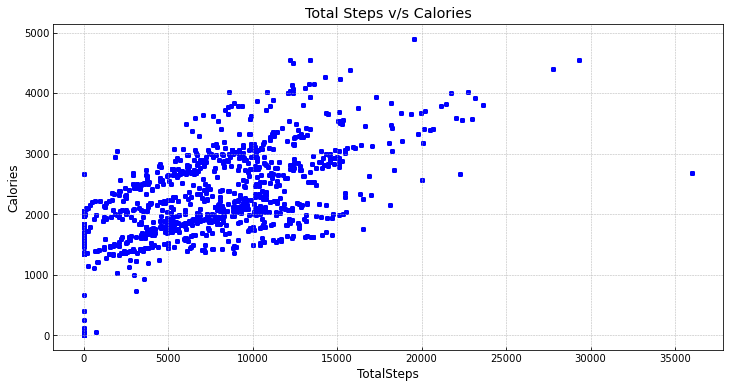

In [88]:
daily_activity_sleep_day_merged.plot.scatter(x='TotalSteps', y='Calories', 
                                             alpha=0.5, figsize=(12,6))
plt.title('Total Steps v/s Calories')
plt.grid(b=True)
plt.savefig('Images/Total_Steps_VS_Calories_Burned.png', facecolor='white')
plt.show()

> **Note :** As we can see on the scatter plot above, there is <b>positive relationship</b> between the two variables, which indicates that <b>the greater the number of steps taken, the more calories the user burns</b>. As discovered earlier, keeping active is crucial for maintaining good health, and the number of steps the individual takes daily has a significant impact on that.

#### Visualizing the average total steps by day of the week

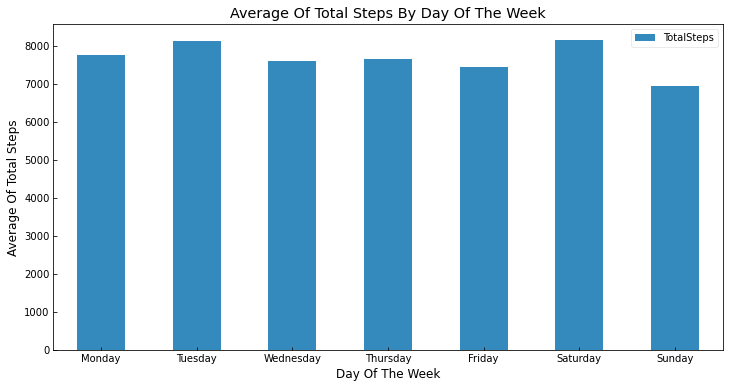

In [89]:
df_day_of_week['TotalSteps'].plot.bar(xlabel='Day Of The Week', ylabel="Average Of Total Steps", 
                                      title="Average Of Total Steps By Day Of The Week",
                                      legend=True, rot=0, figsize=(12,6))
plt.grid(b=False)
plt.savefig('Images/Avg_Total_Steps_Day_Of_Week.png', facecolor='white')
plt.show()

> **Note :** The above bar chart shows us the average total steps taken by the users throughout the week. The most <b>active day in terms of steps take is Saturday, followed by Tuesday</b>. The <b>least active day is Sunday</b> - most likely a rest day for the users. It also gives us the confirmation that the users seem to be consistent with their total steps scores.

#### Visualizing the most active time of the day

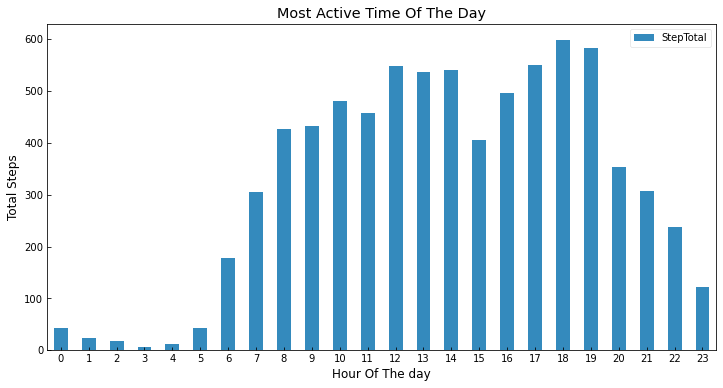

In [90]:
fig, axs = plt.subplots(figsize=(12, 6))
hourly_merged.groupby(hourly_merged['Time'].dt.hour)['StepTotal'].mean().plot(kind='bar', rot=0, ax=axs, 
                                                                              title='Most Active Time Of The Day',
                                                                              legend=True)
plt.xlabel("Hour Of The day")
plt.ylabel("Total Steps")
plt.grid(b=False)
plt.savefig('Images/Most_Active_Time_Of_Day.png', facecolor='white')
plt.show()

> **Note :** The above bar chart shows us that the users tend to be more active between 6 and 8 am. The level of activity stays doesn't change dramatically throughout the day, but the <b>peak hours seem to occur between 5 and 7 pm</b>. Our users are likely choosing to work out after work/school/college hours. Although take a note that their <b>level of activity starts decreasing significantly at 8 pm and keeps going down as the hours progress</b>, likely users seem to go to bed at a reasonable time, as lower levels of activity are recorded at late hours of the night.

#### Visualizing the time of the day users burn the most calories
<p>Earlier we observed positive correlation between the total amount of steps walked and burned calories. Let us now see if the burned calories are fluctuating as much as the activity levels.</p>

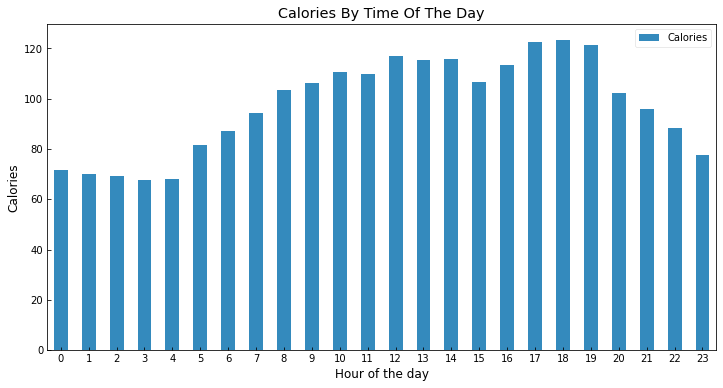

In [91]:
fig, axs = plt.subplots(figsize=(12, 6))
hourly_merged.groupby(hourly_merged['Time'].dt.hour)['Calories'].mean().plot(kind='bar', rot=0, ax=axs, 
                                                                             title='Calories By Time Of The Day',
                                                                             legend=True)
plt.xlabel("Hour of the day")
plt.ylabel("Calories")
plt.grid(b=False)
plt.savefig('Images/Calories_By_The_Time_Of_The_Day.png', facecolor='white')
plt.show()

> **Note :** According to [SleepFoundation](https://www.sleepfoundation.org/how-sleep-works/how-your-body-uses-calories-while-you-sleep#:~:text=As%20a%20very%20approximate%20number,metabolic%20rate2%20(BMR)), we burn around 50 calories an hour while we sleep and we're abe to observe that in the bar chart above. Notice that as the users wake up and start moving, that is when <b>the number of burned calories increases, around the same time that the users are most active during the day</b>.

#### Visualizing the average minutes spend in each activity category

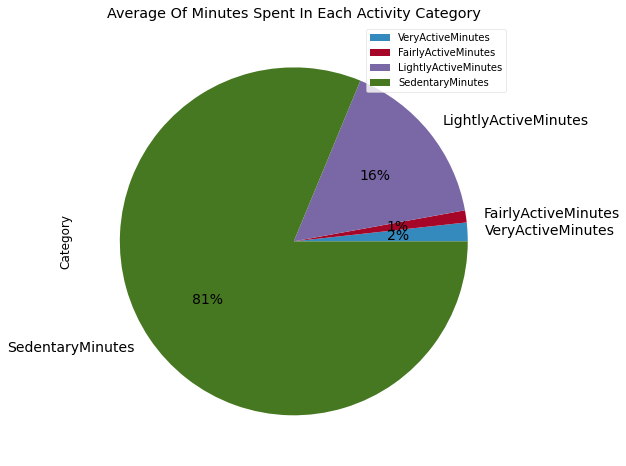

In [92]:
minutes_categories = daily_activity_sleep_day_merged[['VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes']].mean()
minutes_categories.plot.pie(ylabel='Category', title='Average Of Minutes Spent In Each Activity Category',
                            autopct='%1.0f%%', fontsize='14', startangle=0, legend=True, figsize=(16,8))
plt.legend(loc="upper right")
plt.savefig('Images/Avg_Mins_Activity.png', facecolor='white')
plt.show()

> **Note :** The [Department of Health and Human Services](https://www.mayoclinic.org/healthy-lifestyle/fitness/expert-answers/exercise/faq-20057916#:~:text=As%20a%20general%20goal%2C%20aim,your%20risk%20of%20metabolic%20problems.) recommends atleast 30 minutes of moderate physical activity. Reducing sitting time is important to avoid one's risk of developing metabolic problems. Even though our users are being very active more than 30 minutes every day, they're still spending an enormous amount of time being sedentary, which could result in future health issues.

#### Visualizing total minutes asleep v/s total time being awake or not asleep in bed

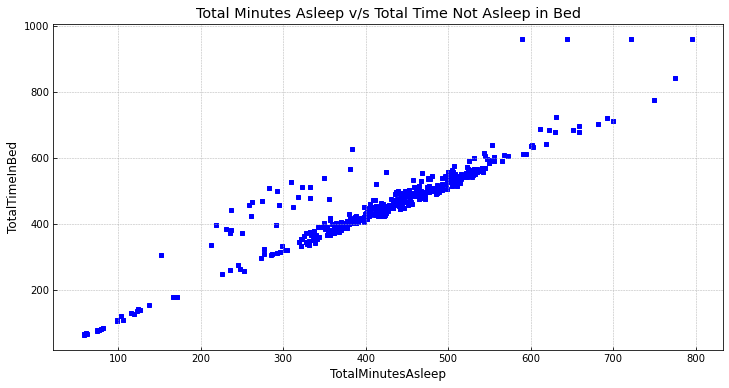

In [93]:
daily_activity_sleep_day_merged.plot.scatter(x='TotalMinutesAsleep', y='TotalTimeInBed', 
                                             alpha=0.5, figsize=(12,6))
plt.title('Total Minutes Asleep v/s Total Time Not Asleep in Bed')
plt.savefig('Images/Total_Mins_Asleep_VS_Awake_In_Bed.png', facecolor='white')
plt.show()

> **Note :** The above scatter plot indicates a strong positive linear association between total number of minutes asleep and the total number of minutes spend being awake in bed which means that most users are usually in bed only when they're sleeping, and not much longer before or after that. However, at times, they do spend good chunk of their time in bed without sleeping, which could be related to the weekends when many people choose to sleep or relax.

#### Visualizing the average of minutes asleep by the day of the week 

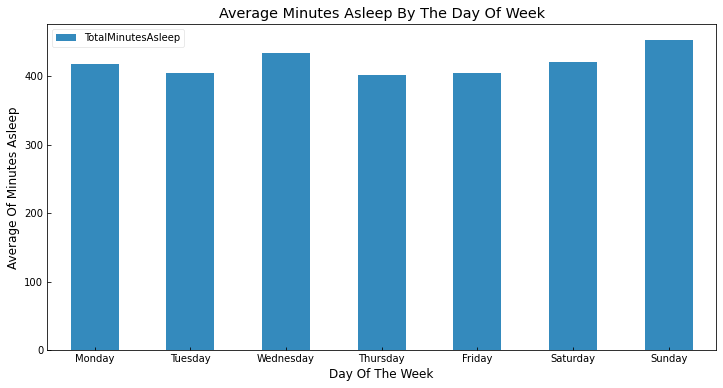

In [94]:
df_day_of_week['TotalMinutesAsleep'].plot.bar(xlabel='Day Of The Week', ylabel='Average Of Minutes Asleep',
                                              legend=True, rot=0, figsize=(12,6),
                                              title="Average Minutes Asleep By The Day Of Week")
plt.grid(b=False)
plt.savefig('Images/Avg_Mins_Asleep_Day_Of_Week.png', facecolor='white')
plt.show()

> **Note :** In the above bar chart, we can see that the average total minutes asleep goes above 400 minutes(almost <b>419.8 minutes</b>) to be exact with <b>Sunday(7.6 hours)</b> and <b>Wednesday(7.2 hours)</b> being the days where the users seem to have slept the most. It is clear from this visualization that there are no significant changes in sleeping time throughout the week. This information shows us that the users have a consistent sleeping schedule. <b>Sunday records the highest number of the Total Minutes Asleep on average</b> If we go back to the <mark>Average of Total Steps By The Day Of The Week</mark> bar graph, notice that Sunday also records the lowest number of the total steps average in the week, emphasizing that <b>Sunday is likely the users choice of a rest day.</b>

#### Visualizing awake time in bed by the day of the week

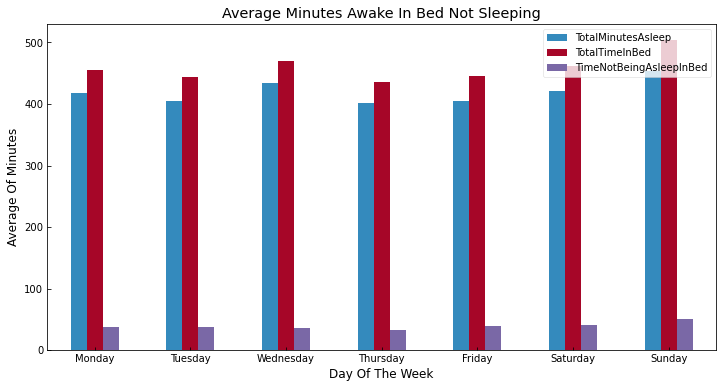

In [95]:
time_bed.plot.bar(xlabel="Day Of The Week", ylabel="Average Of Minutes", 
                  rot=0, figsize=(12,6),
                  title="Average Minutes Awake In Bed Not Sleeping")
plt.legend(loc="upper right")
plt.grid(b=False)
plt.savefig('Images/Avg_Awake_Time_In_Bed_Day_Of_Week.png', facecolor='white')
plt.show()

> **Note :** As we can see from the above bar chart, the users are very consistent with their time in bed throughout the days of the week, and the same goes for the time they're awake in bed. <b>From their total time in bed, they spend on average 39.5 minutes awake</b>. The longest recorded times occurred on the weekend, which is perfectly understandable.

# 6. ACT

### Key Findings 
<p><li>The average users take 7,638 steps and burns 2,304 calories per day.</li></p>
<p><li>There is positive relationship between the total number of steps and the total number of burned calories.</li></p>
<p><li>The users seem to be consistent with their total steps scores throughout the week. The most active day is Saturday, and the least active day is Sunday.</li></p>
<p><li>The users start their day between 6 a.m. and 8 a.m. They're most active between 5 p.m. and 7 p.m. and become least active at 8 p.m. and after.</li></p>
<p><li>The highest number of burned calories occur between 5 p.m. and 7 p.m., when the users are most active.</li></p>
<p><li>Although the average user is very active for over 30 minutes every day, they still spend 81% of their time being sedentary.</li></p>
<p><li>There is strong, positive relationship between the total number of minutes asleep and the total time spent in bed, with users only spending an average of 39.5 minutes of their total time in bed being awake.</li></p>
<p><li>The users have a consistent sleeping schedule, with an average sleeping time of 419.8 minutes(or 7 hours) per night with Sunday(7.6 hours) being the day where the users seem to have slept the most.</li></p>
<p><li>Recording the lowest number of steps and the highest number of minutes asleep, Sunday is likely a rest dat chosen by the users.</li></p>

### Recommendations
<p>Recommendations based on key trends observed in our data to help guide Bellabeat's marketing strategy:</p>
<p><li><b>Personalized notifications to promote activity :</b>The users on average take total steps of 7,638 well below the mark of 10K daily steps recommended by the CDC. In addition, above analysis reveals that users spend about 81% os hteir day being sedentary. Bellabeat could incorporate personalized notifications on its app to motivate users to keep moving throughout the day, which could include real-time information regarding total number of steps taken so far or even number of steps left in order to reach the daily steps goal.</li></p>
<p><li><b>Dynamic Calories Counter :</b>The app could also provide the user with an easy to use interface that displays the number of calories that are being burned throughout the day to improve motivation, the users could also have the option to set customized daily calories goal and be able to follow their progress throughout the day.</li></p>
<p><li><b>Detailed Sleep Log : </b>The average user has a consistent sleeping schedule, but those who may want to improve the quality of their sleep or simply keep a track of it could benefit from a sleeping log. The app could also offer this feature and record sleep quality, the number of times one wakes up during the night, the total amount of time being awake in the bed, anxiety, and/or stress levels.</li></p>
<p><li><b>Weekly or Monthly Achievement Reports : </b>To keep users motivated for long term, the Bellabeat app could provide customized weekly and monhtly reports regarding the total num of steps, burned calories, sleeping habits, weight loss, and total time spent on different levels of activity. The app could send customized congragulatory message/notification to those who keep up with good habits as well as motivational tips for improvement depending on the users overall performance.</li></p>
<p><li><b>Meditation, Relaxation and Workout Video Services : </b>The app could also offer meditation and relaxation tips services either for free or premium basis to those who are looking to improve their sleep quality and/or reduce stress and anxiety levels by tracking the time of the day when their activity decreases, their rest days, or perhaps around bedtime, the app could send notifications to the persons phone or smart device and suggest different relaxation or meditation techniques. And for those looking for motivation and mostly sedentary the app could suggest some exercises in form of notifications with pictures or videos to be active and improve their health by tracking their total steps taken, calories burned and the activity level.</li></p>
<p><li><b>Discounts on other Bellabeat wellness products and services : </b>Another way to keep customers motivated is to offer special discounts on different Bellabeat products, as well as their premium memberships. This way, the users could become more inclined to get more active and purchase more products from the company.</li></p>